<font color=black></font>

## Introduction

In this notebook, we'll explore Nasa's asteroids information dataset in order to:

- Finding potential hazardous and non-hazardous asteroids
- Features responsible for claiming an asteroid to be hazardous

We'll perform some data preparation and use different models to predict if an asteroid is hazardous or not

#### Import relevant packages and load the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix, confusion_matrix, recall_score, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.shape

(4687, 40)

**Dataset** consist of 4687 samples and 40 features. The **'Hazardous'** independent feature has boolean values so we convert it to binary values.

In [4]:
df['Hazardous'] = df['Hazardous'].astype(int)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


#### Check for missing values:

In [5]:
df.isnull().values.any()

False

#### Explore columns types:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Majority of types are contininuous except for 4 columns: **'Close Approach Date'**, **'Orbit Determination Date'**, **Orbiting Body'** and **'Equinox'**. <br> Let's look into them:

In [7]:
pd.unique(df['Close Approach Date'])

array(['1995-01-01', '1995-01-08', '1995-01-15', '1995-01-22',
       '1995-02-08', '1995-02-15', '1995-02-22', '1995-03-08',
       '1995-03-15', '1995-03-22', '1995-04-08', '1995-04-15',
       '1995-04-22', '1995-05-08', '1995-05-15', '1995-05-22',
       '1995-06-08', '1995-06-15', '1995-06-22', '1995-07-08',
       '1995-07-15', '1995-07-22', '1995-08-08', '1995-08-15',
       '1995-08-22', '1995-09-08', '1995-09-15', '1995-09-22',
       '1995-10-08', '1995-10-15', '1995-10-22', '1995-11-08',
       '1995-11-15', '1995-11-22', '1995-12-08', '1995-12-15',
       '1995-12-22', '1996-01-08', '1996-01-15', '1996-01-22',
       '1996-02-08', '1996-02-15', '1996-02-22', '1996-03-08',
       '1996-03-22', '1996-04-08', '1996-04-15', '1996-04-22',
       '1996-05-08', '1996-05-15', '1996-05-22', '1996-06-08',
       '1996-06-15', '1996-06-22', '1996-07-08', '1996-07-15',
       '1996-07-22', '1996-08-08', '1996-08-15', '1996-08-22',
       '1996-09-08', '1996-09-15', '1996-09-22', '1996-

This column contains only **dates** so we can convert in to int.

In [8]:
pd.unique(df['Orbit Determination Date'])

array(['2017-04-06 08:36:37', '2017-04-06 08:32:49',
       '2017-04-06 09:20:19', ..., '2017-04-06 08:23:43',
       '2017-04-06 08:23:42', '2017-04-29 06:18:33'], dtype=object)

This column contains both **date** and **time stamp**.
<br>We convert this column to datetime, split using dt attribute to date and time, replace the existing column with only date value and convert to int

In [9]:
pd.unique(df['Orbiting Body'])

array(['Earth'], dtype=object)

In [10]:
pd.unique(df['Equinox'])

array(['J2000'], dtype=object)

Both columns contains **single value** so we can delete them.<br>**We'll apply those actions on object type columns through iteration over dataframe's columns:**


In [11]:
for item in df.dtypes.iteritems():
    if item[1] == 'O':
        column = item[0]
        if len(np.unique(df[column])) > 1:
            df[column] = pd.to_datetime(df[column]).dt.date
            df[column] = pd.to_numeric(df[column].apply(str).str.replace("-",""))
        else:
            df.drop(column, axis = 1, inplace = True)

#### Check data again:

In [12]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date               int64
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbit ID                          int64
Orbit Determination Date          int64
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64


In [13]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


**'Neo Reference ID'** and **'Name'** are ID numbers therefore irrelevant for classification so we'll delete them.

In [14]:
df.drop(['Neo Reference ID', 'Name'], axis = 1, inplace = True)

**'Est Dia'** repeats itself with different units. We'll leave only **KM** and delete the rest.<br> **'Miss Dist'** repeats itself with different units.  We'll leave only **KM** and delete the rest.<br> **'Relative Velocity'** repeats itself with different units. We'll leave only **KM per hour** and delete the rest.

**Create a function** that finds columns with same name and different units and deletes them:

In [15]:
def delete_different_units_columns(dataset, col_name, unit = None):
    '''
    Function deletes same columns with different units from dataset.
    Parameters
    -------
    dataset : Pandas DataFrame
    col_name : string
            Column name
    unit : string
        Unit to keep, optional in case of just deleting columns
    Returns
    -------
    dataset : Pandas DataFrame with remaining columns
    '''
    same_cols = [col for col in dataset.columns if col_name in col]
    if unit:
       same_cols = [col for col in same_cols if unit not in col]
    dataset.drop(dataset[same_cols], axis = 1, inplace = True)
    return dataset

In [18]:
df = delete_different_units_columns(dataset = df, col_name = 'Est Dia in', unit = 'K')    
df = delete_different_units_columns(dataset = df, col_name = 'Miss Dist', unit = 'k')
df = delete_different_units_columns(dataset = df, col_name = 'Relative', unit = 'per hr')

**Check the data:**

In [13]:
df.dtypes

Absolute Magnitude             float64
Est Dia in KM(min)             float64
Est Dia in KM(max)             float64
Close Approach Date              int64
Epoch Date Close Approach        int64
Relative Velocity km per hr    float64
Miles per hour                 float64
Miss Dist.(kilometers)         float64
Orbit ID                         int64
Orbit Determination Date         int64
Orbit Uncertainity               int64
Minimum Orbit Intersection     float64
Jupiter Tisserand Invariant    float64
Epoch Osculation               float64
Eccentricity                   float64
Semi Major Axis                float64
Inclination                    float64
Asc Node Longitude             float64
Orbital Period                 float64
Perihelion Distance            float64
Perihelion Arg                 float64
Aphelion Dist                  float64
Perihelion Time                float64
Mean Anomaly                   float64
Mean Motion                    float64
Hazardous                

**Replace** the remaining **'Est Dia in KM'** **min** and **max** columns with average value column.

In [16]:
dia_avg = df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis = 1)
df.insert(loc = 1, column = 'Mean Est Dia', value = dia_avg)
df.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)'], axis = 1, inplace = True)

#### Check the data:

In [19]:
df.dtypes

Absolute Magnitude             float64
Mean Est Dia                   float64
Close Approach Date              int64
Epoch Date Close Approach        int64
Relative Velocity km per hr    float64
Miles per hour                 float64
Miss Dist.(kilometers)         float64
Orbit ID                         int64
Orbit Determination Date         int64
Orbit Uncertainity               int64
Minimum Orbit Intersection     float64
Jupiter Tisserand Invariant    float64
Epoch Osculation               float64
Eccentricity                   float64
Semi Major Axis                float64
Inclination                    float64
Asc Node Longitude             float64
Orbital Period                 float64
Perihelion Distance            float64
Perihelion Arg                 float64
Aphelion Dist                  float64
Perihelion Time                float64
Mean Anomaly                   float64
Mean Motion                    float64
Hazardous                        int32
dtype: object

In [21]:
df.head()

,Absolute Magnitude,Mean Est Dia,Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(kilometers),Orbit ID,Orbit Determination Date,Orbit Uncertainity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.205846,19950101,788947200000,22017.003799,13680.509944,62753692.0,17,20170406,5,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.236343,19950101,788947200000,65210.346095,40519.173105,57298148.0,21,20170406,3,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.374578,19950108,789552000000,27326.560182,16979.661798,7622911.5,22,20170406,0,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.014241,19950115,790156800000,40225.948191,24994.839864,42683616.0,7,20170406,6,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.205846,19950115,790156800000,35426.991794,22012.954985,61010824.0,25,20170406,1,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [20]:
# This warning suppression is for sns.scatterplot
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Divide** data to dependent and independent variables.

In [21]:
X, y = df.iloc[:, :-1], df.iloc[:,-1]

**Split** them to train and test datasets before apply any preproccesing techniques.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

**Visualize** our data using **TSNE** technique:

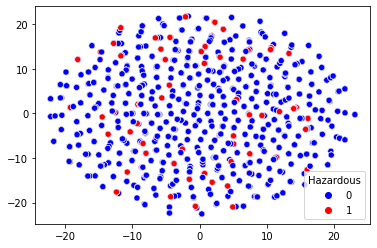

In [23]:
tsne = TSNE(n_components = 2, perplexity = 10, n_iter = 300)
tsne_res = tsne.fit_transform(X)

sns.scatterplot(tsne_res[:,0], tsne_res[:,1], hue = y, legend = 'full', palette = ['b', 'r'])
plt.show()

**Check for hazardous asteroids's quantity:**

In [24]:
classes = pd.value_counts(df['Hazardous'])
classes

0    3932
1     755
Name: Hazardous, dtype: int64

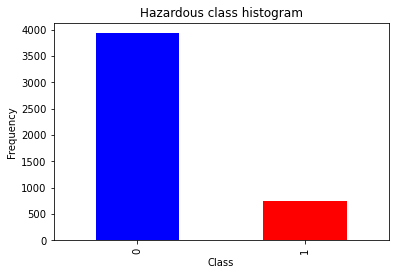

In [25]:
classes.plot(kind = 'bar', color = ['b', 'r'])
plt.title('Hazardous class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [26]:
print(f'Percentage of hazardous asteroids is: {classes[1]*100/df.shape[0]:.2f}%')

Percentage of hazardous asteroids is: 16.11%


We have **16% of hazardous asteroids** so data is **medium imbalanced.**
<br>**Random oversampling** simply replicates randomly the minority class examples and is known to increase the likelihood of occurring overfitting.
<br>We'll use **SMOTE** method to avoid the over-fitting problem on training dataset.
This method generates synthetic data based on the feature space similarities between 
existing minority instances using K-nearest neighbors and  linear interpolations.

In [28]:
smote = SMOTE(random_state = 42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [29]:
classes_over = pd.value_counts(y_train_over)
print(classes_over)

1    2752
0    2752
Name: Hazardous, dtype: int64


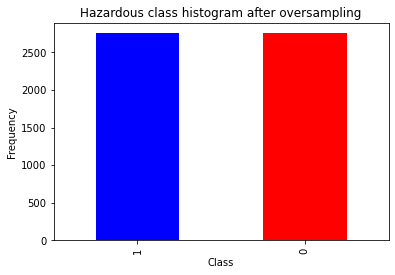

In [30]:
classes_over.plot(kind = 'bar', color = ['b', 'r'])
plt.title('Hazardous class histogram after oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**After oversampling, quantity of both classes is equal.**

#### Create a new dataset to check data distribution and correlation:

In [31]:
df_over = pd.concat([X_train_over, y_train_over], axis = 1)

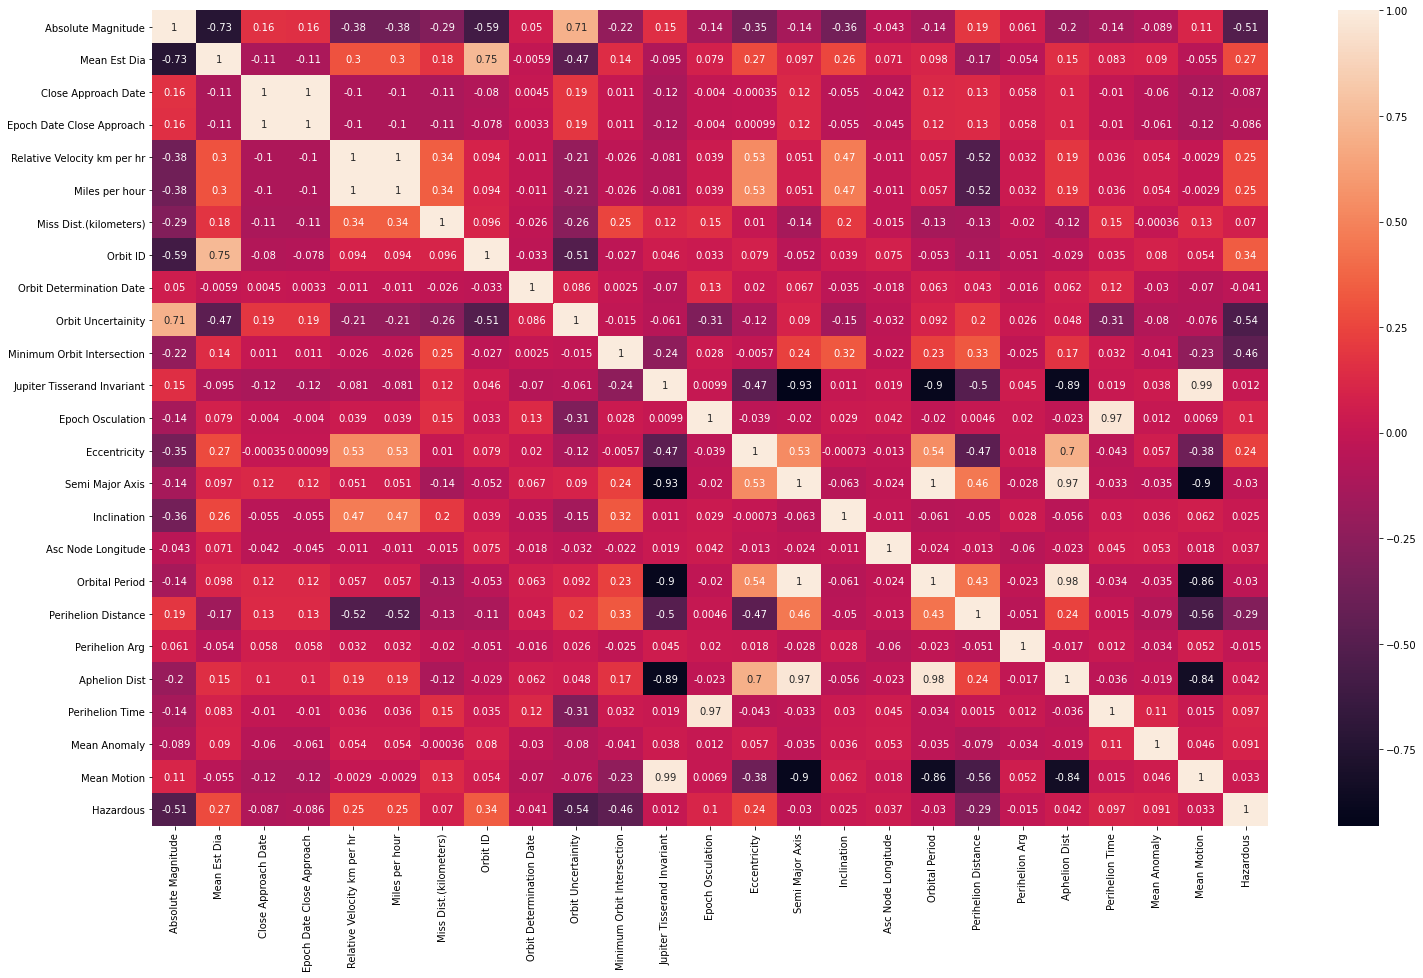

In [32]:
plt.figure(figsize = (25, 15))
corr = df_over.corr()
sns.heatmap(corr, annot = True)
plt.show()

We can see negative correlation between **'Absolute Magnitude'**, **'Orbit Uncertainity'**,
**'Minimum Orbit Intersection'**, **'Perihelion Distance'** features and target values.
The lower the value, the greater the probability of hazardous asteroid.
<br>Let's see how those features are **distributed:**

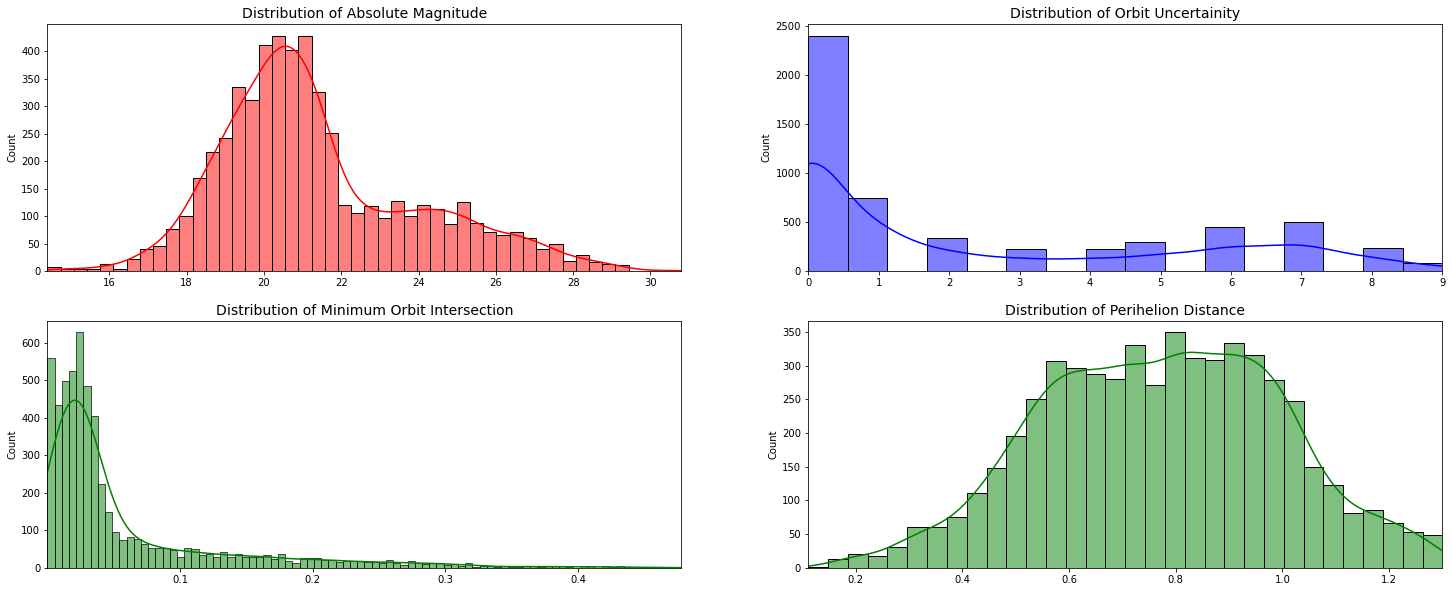

In [33]:
fig, ax = plt.subplots(2, 2, figsize = (25,10))

absolute_magnitude_val = df_over['Absolute Magnitude'].values
orbit_uncertainity_val = df_over['Orbit Uncertainity'].values
minimum_orbit_intersection_val = df_over['Minimum Orbit Intersection'].values
perihelion_distance_val = df_over['Perihelion Distance'].values

sns.histplot(absolute_magnitude_val, ax = ax[0,0], color = 'r', kde = True)
ax[0,0].set_title('Distribution of Absolute Magnitude', fontsize = 14)
ax[0,0].set_xlim([min(absolute_magnitude_val), max(absolute_magnitude_val)])

sns.histplot(orbit_uncertainity_val, ax = ax[0,1], color = 'b', kde = True)
ax[0,1].set_title('Distribution of Orbit Uncertainity', fontsize = 14,)
ax[0,1].set_xlim([min(orbit_uncertainity_val), max(orbit_uncertainity_val)])

sns.histplot(minimum_orbit_intersection_val, ax = ax[1,0], color = 'g', kde = True)
ax[1,0].set_title('Distribution of Minimum Orbit Intersection', fontsize = 14,)
ax[1,0].set_xlim([min(minimum_orbit_intersection_val), max(minimum_orbit_intersection_val)])

sns.histplot(perihelion_distance_val, ax = ax[1,1], color = 'g', kde = True)
ax[1,1].set_title('Distribution of Perihelion Distance', fontsize = 14,)
ax[1,1].set_xlim([min(perihelion_distance_val), max(perihelion_distance_val)])

plt.show()

**'Absolute Magnitude'** has an approximately bi-model distribution, it's not uncommon to believe that the data comes from a mixture of two normal distributions
<br>**'Orbit Uncertainity'** has a bi-model distribution.
<br>**'Minimum Orbit Intersection'** has a skewed distribution indicating that it is not normal.
<br>**'Perihelion Distance'** has an approximately normal distribution.

Have a closer look using **boxplot:**

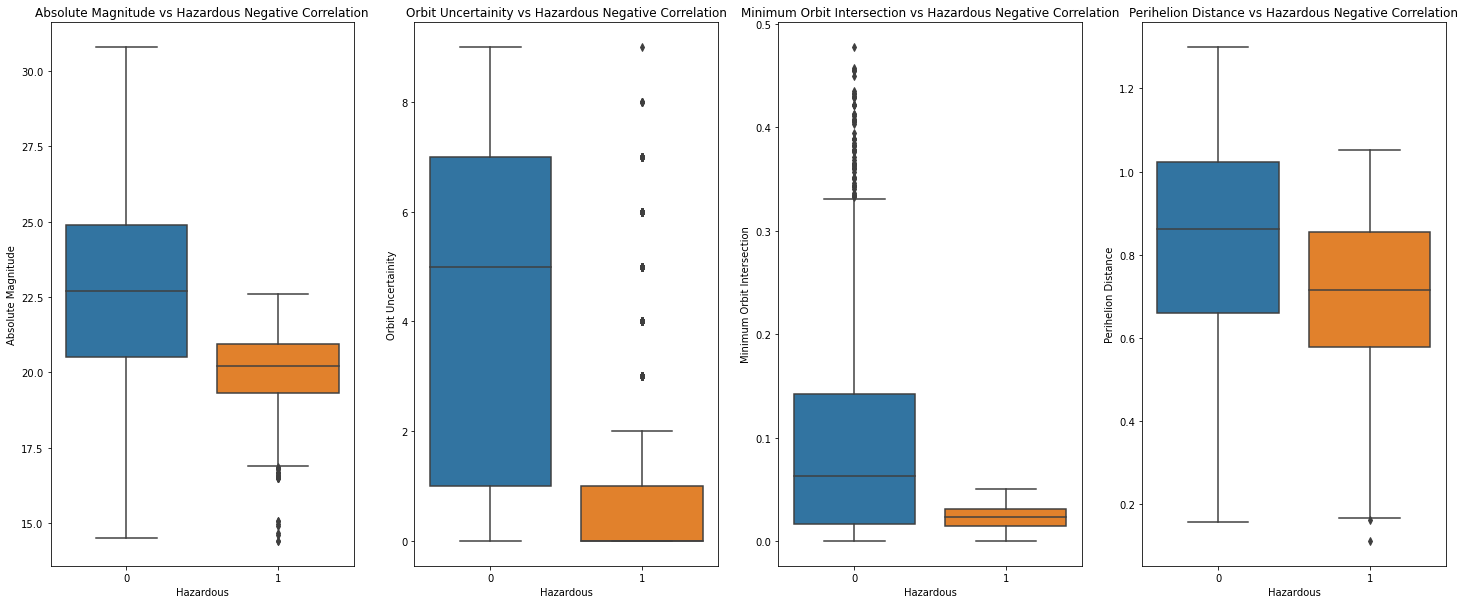

In [34]:
f, axes = plt.subplots(ncols = 4, figsize = (25,10))

sns.boxplot(x = 'Hazardous', y = 'Absolute Magnitude', data = df_over, ax = axes[0])
axes[0].set_title('Absolute Magnitude vs Hazardous Negative Correlation')

sns.boxplot(x = 'Hazardous', y = 'Orbit Uncertainity', data = df_over, ax = axes[1])
axes[1].set_title('Orbit Uncertainity vs Hazardous Negative Correlation')

sns.boxplot(x = 'Hazardous', y = 'Minimum Orbit Intersection', data = df_over, ax = axes[2])
axes[2].set_title('Minimum Orbit Intersection vs Hazardous Negative Correlation')

sns.boxplot(x = 'Hazardous', y = 'Perihelion Distance', data = df_over, ax = axes[3])
axes[3].set_title('Perihelion Distance vs Hazardous Negative Correlation')

plt.show()

We'll **leave outliers for now in order to avoid an information loss** and see later how accurate
will be our models.

Apply feature scaling for distance algorithms like **KNN** and **SVM**. We'll use **Standardization** technique and see the model's results.

In [44]:
scaler = StandardScaler().fit(X_train_over)
X_train_over = scaler.transform(X_train_over)
X_test = scaler.transform(X_test)

Also apply **Standardization on imbalanced data** in order to see the diffences in score results.

In [46]:
scaler_imb = StandardScaler().fit(X_train)
X_train = scaler_imb.transform(X_train)

#### Evaluate optional models:
Our data is mainly circular so logistic regression probably won't be the best idea. 
<br>We'll evaluate **Naive Bayes**, **Random Forest**, **KNearestNeighbors** and **SVM Classifier with RBF kernel** which is useful when the data-points are not linearly separable.

In [40]:
models_names = ['GaussianNB', 'RandomForest', 'SVM', 'KNN']

**Evaluation will be performed both on balanced and imbalanced training datasets.**

**Write a few functions:** classifiers initialization, fitting and evaluating the models, plotting results.<br>In **fit_and_evaluate** function, we'll use **cross_val_score** method for cross validation with default 5-fold.

In [36]:
def init_classifiers():
    clf_nb = GaussianNB()
    clf_rf = RandomForestClassifier(random_state = 42)
    clf_svm = SVC()
    clf_knn = KNeighborsClassifier()
    return clf_nb, clf_rf, clf_svm, clf_knn

In [37]:
def fit_and_evaluate(X, y, score_metrics, models):
    '''
    Function fits and evaluates the training data using cross_val_score.
    Parameters
    ----------
    X : numpy Array of float64
        Dataset of dependent variables
    y : numpy Array of float64
        Labels
    score_metrics : string
        Metrics name
    models : list
        List of classifiers after initialization
    Returns
    -------
    tuple
        Scores list after Cross_val_score and index of the higher score
    '''
    f1_scores = []
    for model in models:
        f1_values = cross_val_score(model, X, y, scoring = score_metrics)
        f1_scores.append(np.mean(f1_values))
    return f1_scores, np.argmax(f1_scores)

In [39]:
def plot_evaluation_results(models_names, scores, score_metrics):
    plt.figure(figsize = (10, 5))
    plt.bar(models_names, scores, color ='purple', width = 0.4)  
    for index,data in enumerate(scores):
        plt.text(x = index-0.1 , y = data+0.01, s = f'{round(data, 3)}' , 
                 fontdict = dict(fontsize = 12))
    plt.xlabel('Models') 
    plt.ylabel('Mean {} score'.format(score_metrics)) 
    plt.title('Cross validation results') 
    plt.show() 

**Evaluate the Imbalanced training data:**

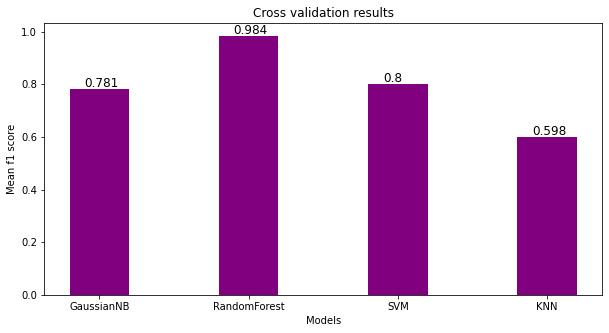

In [48]:
models = list(init_classifiers())
f1_scores, clf_idx = fit_and_evaluate(X_train, y_train, 'f1', models)
plot_evaluation_results(models_names, f1_scores, 'f1')

**Evaluate the Balanced training data:**

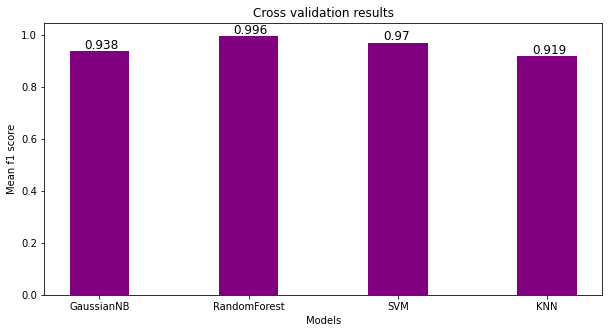

In [49]:
models = list(init_classifiers())
f1_scores, clf_idx = fit_and_evaluate(X_train_over, y_train_over, 'f1', models)
plot_evaluation_results(models_names, f1_scores, 'f1')

In [61]:
clf = models[clf_idx]
print(f'{models_names[clf_idx]} gives better result among other algorithms with f1 score')

RandomForest gives better result among other algorithms with f1 score


**Random Forest** performs very well in both cases unlike other algorithms. But for **test data**, we'll use the **balanced dataset.**

#### Apply it on the test dataset:

In [54]:
clf.fit(X_train_over, y_train_over)
y_pred = clf.predict(X_test)
print(f'Test f1 score: {f1_score(y_test, y_pred):.4f}')

Test f1 score: 0.9912


Test **f1_score** is great too. In addition, we'll evaluate the results with **confusion matrix**.     

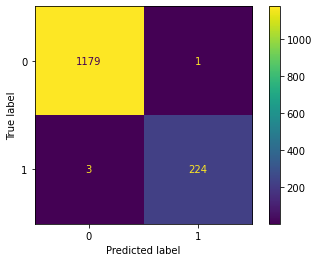

In [56]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Let's look at **classification report:**

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1180
           1       1.00      0.99      0.99       227

    accuracy                           1.00      1407
   macro avg       1.00      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [58]:
recall = recall_score(y_test, y_pred)
error = round((1 - recall)*100, 2)
print(f'Recall value is: {recall:.4f}')
print(f'The error in identifying hazardous asteroids is {error}%')  

Recall value is: 0.9868
The error in identifying hazardous asteroids is 1.32%


## Summary:

## Our model classifies asteroids pretty well with:
- **99.12% f1 score** on test data
- **0.9868 recall value / 1.32% error** in identifying hazardous asteroids

**After fitting and evaluating the model, let's check which features were most important.**

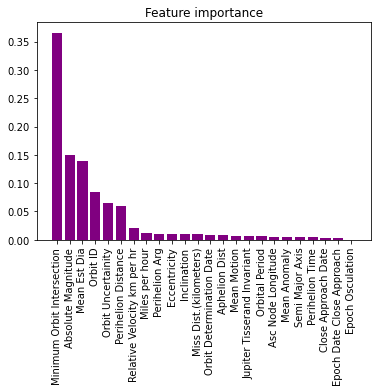

First 4 most important features in decsending order:
Minimum Orbit Intersection, Absolute Magnitude, Mean Est Dia, Orbit ID


In [60]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar([df.columns[index] for index in indices], np.sort(importances)[::-1], color = 'purple')
plt.title('Feature importance')
plt.xticks(rotation='vertical')
plt.show()
print('First 4 most important features in decsending order:')
print(*[df.columns[index] for index in indices[:4]], sep = ", ") 

According to heatmap, **'Mean Est Dia'** didn't have high correlation with our target column but it had high negative correlation with **'Absolute Magnitude'**.

In the end, we had nice scores without the need of hyperparameter tuning.